In [1]:
import itertools
from sage.plot.plot3d.shapes import *
from sage.plot.plot3d.shapes2 import Line
from flatsurf import *

In [2]:
# 6/14. I think this is a more natural choice for a quotient of the surface.

Face_1 = polygon3d([[1.5,1.5,1], [-1.5,1.5,1],[-1.5,.5,1],[1.5,.5,1]], alpha = 0.9, color='lightgray')
Face_2 = polygon3d([[1.5,.5,1],[.5,.5,1],[.5,-.5,1],[1.5,-.5,1]], alpha = 0.9, color='lightgray')
Face_3 = polygon3d([[1.5,1.5,0],[-1.5,1.5,0],[-1.5,1.5,1],[1.5,1.5,1]], alpha = 0.9, color = 'gray')


Edge_1 = LineSegment([1.5,1.5,0], [1.5,-1.5,0], 2, color='red') + LineSegment([.5,.5,1], [.5,-.5,1], 2, color='red')
Edge_2 = LineSegment([1.5,1.5,0], [1.5,-1.5,0], 2, color='orange') + LineSegment([.5,.5,1], [.5,-.5,1], 2, color='orange')
Edge_3 = LineSegment([1.5,1.5,0], [1.5,-1.5,0], 2, color='yellow') + LineSegment([.5,.5,1], [.5,-.5,1], 2, color='yellow')
Edge_4 = LineSegment([1.5,1.5,0], [1.5,-1.5,0], 2, color='green') + LineSegment([.5,.5,1], [.5,-.5,1], 2, color='green')


P = Face_1 + Face_1.translate(0,-2,0)
P += Face_2 + Face_2.translate(-2,0,0)
P += Face_3
P += Face_3.rotate((0,0,1),math.pi/2)
P += Face_3.rotate((0,0,1),math.pi)
P += Face_3.rotate((0,0,-1),math.pi/2)


Q = Edge_1
Q += Edge_2.rotate((0,0,1),math.pi/2)
Q += Edge_3.rotate((0,0,1),math.pi)
Q += Edge_4.rotate((0,0,-1),math.pi/2)

P.plot() + Q.plot()

Graphics3d Object

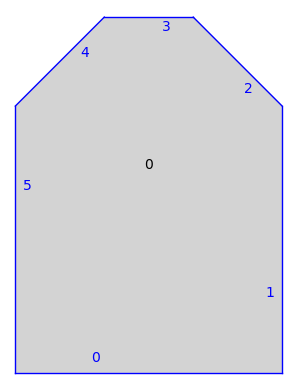

In [425]:
s = Surface_list(QQ)

# Let i = ratio of inner edge / outer edge
# I don't know why this fails for i>0.819?
i = 1/3
P = flatsurf.polygons(vertices = [(0,0),(1,0),(1,1),(1/2 + i/2,(3-i)/2),(1/2-i/2,(3-i)/2),(0,1)])


s.add_polygon(P)
s.add_polygon(P)
s.add_polygon(P)
s.add_polygon(P)


S = SimilaritySurface(s)

for i in range(4):
    s.set_edge_pairing(0,0,0,3)
    s.set_edge_pairing(0,1,0,5)
    s.set_edge_pairing(0,2,0,4)
    
S.plot(edge_labels='number')


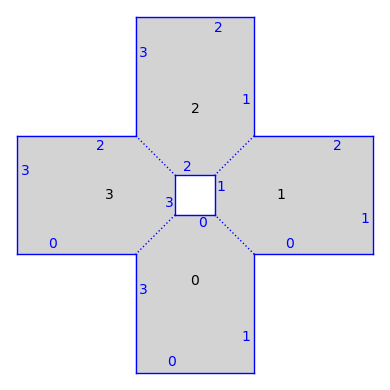

In [426]:
# This is one projection of the surface.

# Define non-regular hexagon in QQ.
# Hard coding inner/outer edge ratio to 1/3.
s = Surface_list(QQ)
P = flatsurf.polygons(vertices = [(0,0),(3,0),(3,3),(2,4),(1,4),(0,3)])

# One copy in each direction.
s.add_polygon(P)
s.add_polygon(P)
s.add_polygon(P)
s.add_polygon(P)

S = SimilaritySurface(s)

# Pair edges.
for i in range(4):
    s.set_edge_pairing(i,0,i,3)
    s.set_edge_pairing(i,1,(i+1)%4,5)
    s.set_edge_pairing(i,2,(i+1)%4,4)

# Make 45 degree diagonal edges adjacent.
gs = S.graphical_surface()
gs.make_adjacent(0,2)
gs.make_adjacent(1,2)

gs.plot()

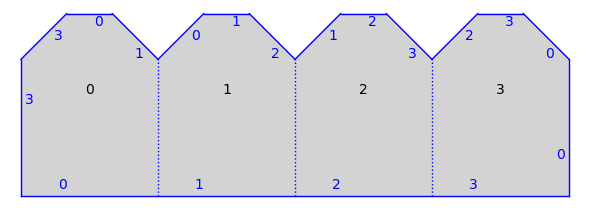

In [427]:
# Or, rearranged, another projection...

gs.make_adjacent(0,1)
gs.make_adjacent(1,1)
gs.make_adjacent(2,1)

gs.plot()

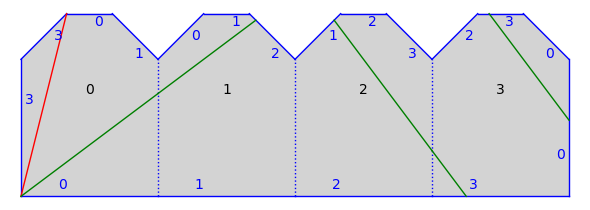

In [462]:
# Playing with trajectories. Under these parameters, red is a closed saddle conenction. Green is not.

v = S.tangent_vector(0, (0,0), (1,4))
w = S.tangent_vector(0, (0,0), (4,3))
traj1 = v.straight_line_trajectory()
traj2 = w.straight_line_trajectory()
traj1.flow(20)
traj2.flow(4)
# traj2.is_closed()
S.plot() + traj1.plot(color='red') + traj2.plot(color='green')